# Heart Disease

## Objective of Data Collection: 
Collecting this data aims to help predict the likelihood of heart disease in patients by analyzing key health factors like age, cholesterol levels, blood pressure, and symptoms experienced during exercise. By gathering this information, the aim is to identify individuals at risk early on, so that preventive measures and treatments can be provided promptly. This data can be used for classification to build models that assist healthcare providers in making better decisions, as well as for clustering to discover patterns and subgroups within the patient population. Ultimately, this improves patient outcomes and reduces the number of heart-related deaths. 

## The source of dataset:
https://www.kaggle.com/code/parsalatifi/heart-failure-prediction-95-accuracy-score

In [29]:
import piplite
await piplite.install('seaborn') 
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('HeartFailure.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


## General Information 

In [30]:
data = pd.read_csv('HeartFailure.csv')
num_attributes = data.shape[1]  
num_objects = data.shape[0] 
attribute_types = data.dtypes.to_frame(name='Data Types')
class_name = data.columns[-1]  
class_label = data.columns[-1]

print(f"\033[1mGeneral information:\n")
print(f"\033[1mNumber of attributes:\033[0m {num_attributes}\n")
print(f"\033[1mNumber of objects:\033[0m {num_objects}\n")
print(f"\033[1mClass lable: \033[0m{class_label}\n")
print(f"\033[1mAttribute types:\033[0m")
print(attribute_types)

General information:

Number of attributes: 12

Number of objects: 918

Class lable: HeartDisease

Attribute types:
               Data Types
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64


In [31]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Sample of the data

In [32]:
data = pd.read_csv('HeartFailure.csv')
sample=data.sample(n=20);
print(sample);

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
710   47   M           ASY        110          275          0        LVH   
426   56   M           ATA        126          166          0         ST   
519   63   M           ASY         96          305          0         ST   
684   47   M           NAP        108          243          0     Normal   
446   54   M           ASY        130            0          0         ST   
537   74   M           ASY        150          258          1         ST   
373   59   M           ASY        135            0          0     Normal   
847   45   M           ASY        115          260          0        LVH   
632   53   M           ASY        140          203          1        LVH   
488   65   M            TA        140          252          0     Normal   
25    36   M           NAP        130          209          0     Normal   
274   45   F           ATA        180          295          0     Normal   
609   46   M

## Show the Min , 1st Qu , Median, Mean ,3rd Qu ,Max, Standard deviation for each numeric column: 

In [33]:
data = pd.read_csv('HeartFailure.csv')
summary_statistics=data.describe();
print(summary_statistics); 

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


#### After analyzing the summary statistics, several important insights can be seen:
* Age: Patients’ ages range from 28 to 77, with a median of 54 and a mean of 53.5, indicating a middle-aged population. Most patients are in the middle-aged to elderly range, as 50% of the patients are aged 54 or older, while 25% are younger than 47.

* RestingBP: The values have a mean of 132.4 and a median of 130. The interquartile range is 120 to 140, showing that most patients have normal blood pressure levels. However, a minimum value of 0 suggests data errors, which will be handled later. 

* Cholesterol: The majority of patients (IQR: 173 to 267) fall within normal(<200) to borderline high(>240) cholesterol levels. However, a minimum value of 0 suggests data errors, which will be handled later.

* FastingBS: Most patients (76.7%) have normal fasting blood sugar levels (0), while a small portion (23.3%) have elevated levels (1).

* MaxHR: Maximum heart rates vary between 60 and 202, with a median of 138, indicating diverse cardiovascular performance.
  
* Oldpeak: The IQR (0 to 1.5) means most patients experience mild to moderate ST depression during exercise, which is a common indicator of ischemia (reduced blood flow due to a blockage or narrowing of blood vessels) or heart disease.

* HeartDisease: The target variable indicates that 55.3% of patients have heart disease, while 44.7% do not, showing a relatively balanced distribution with a slight majority having heart disease.


Calculation used: IQR = Q3 - Q1. It measures the spread of the middle 50% of data, helping to identify inconsistencies and detect outliers. It's also useful for understanding the data's concentration.

## Varaince

In [34]:
data = pd.read_csv('HeartFailure.csv')
variance= data.var(numeric_only=True);
print(variance);

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64


Key observations from the variance shown: 
* Age: Moderate Variance is 88.97, indicating moderate variability in patient ages, which aligns with the wide age range (28–77).
* RestingBP: A high variance of 342.77 shows high variability in the readings, indicating diverse patient conditions. An outlier of value 0 may inflate this variance. 
* Cholesterol: Very high variance (11964.89) which suggests extreme differences in cholesterol levels, mostly due to the outliers (0 values) and the wide range of values (0–603). 
* FastingBS: A low variance of 0.18 reflects the imbalanced distribution, where the majority of patients have normal fasting blood sugar levels (0).
* MaxHR: A high variance of 648.23 indicates significant differences in maximum heart rates.
* Oldpeak: Low variance (1.14) means that there’s little variation in ST depression during exercise, with most values clustered close together.
* HeartDisease: A variance of 0.25 shows a fairly balanced split between heart disease and no heart disease cases.

_When calculating variance for a binary variable, the result will generally be low because the possible values (0 and 1) are close to each other._

## Data representation
Analyzing the Data through Graphical Representations:

To explore the relationship between heart disease and various attributes, visual representations such as graphs are crucial. The "HeartDisease" label, which classifies individuals as affected or unaffected by heart disease, serves as the primary target variable. By examining how this label is associated with other attributes in the dataset, we can extract meaningful relationships and assess whether an increase in certain attributes correlates with a higher likelihood of heart disease. Furthermore, these visual analyses can help reveal if factors like gender and age show significant trends—whether heart disease is more common in men or women and whether age has a positive or negative correlation with the disease. This approach helps identify key risk factors and potential indicators that may contribute to early diagnosis of heart disease

### Pie chart

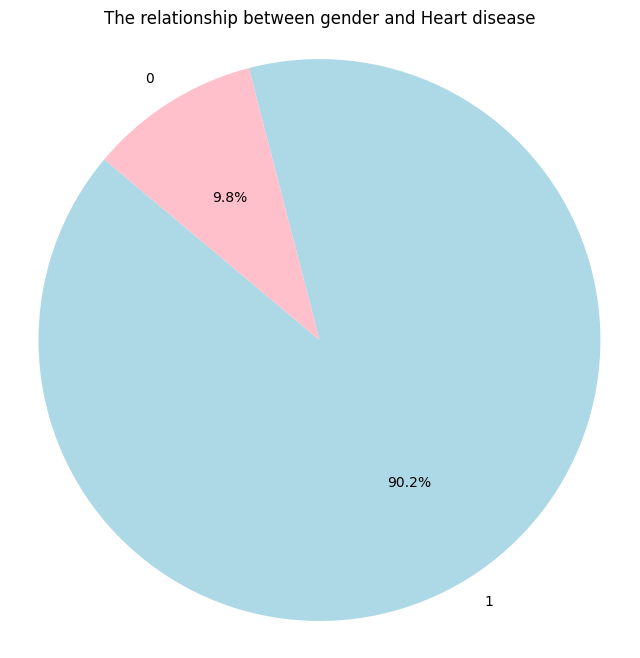

In [49]:
genderDiagnosisCounts = data[data['HeartDisease'] == 1]['Sex'].value_counts();
plt.figure(figsize=(8, 8));
plt.pie(genderDiagnosisCounts, labels=genderDiagnosisCounts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue','pink']);
plt.title('The relationship between gender and Heart disease');
plt.axis('equal');
plt.show();

Text(0.5, 1.0, 'FastingBS')

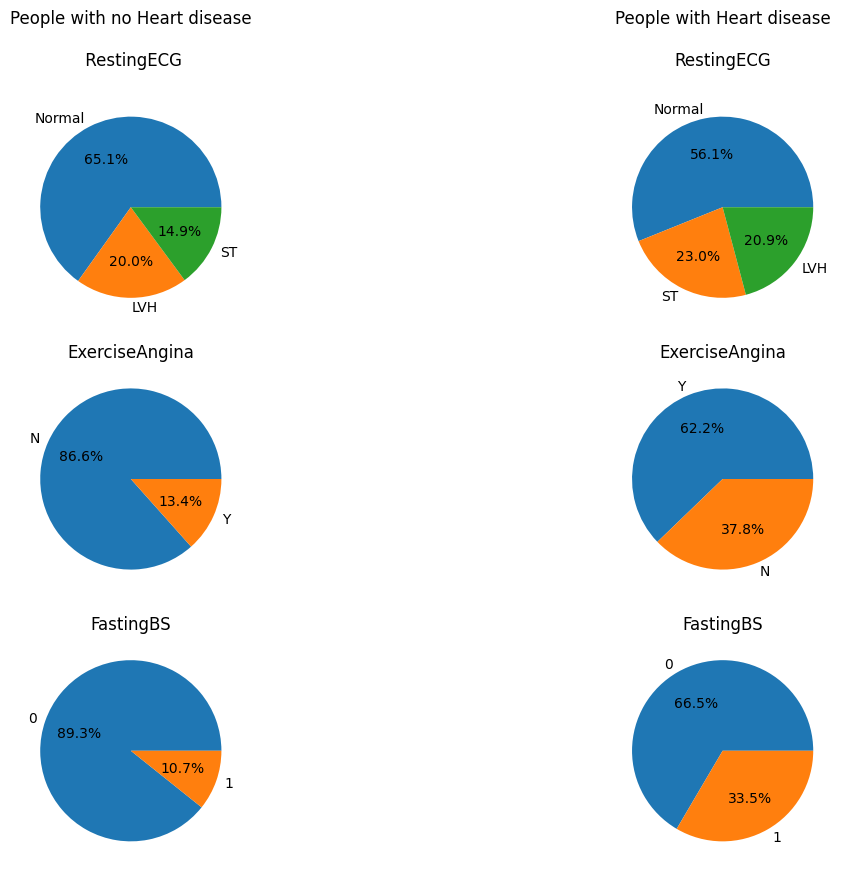

In [72]:
fig,axs = plt.subplots(3,2,figsize = (14,10))
axs[0, 0].pie( data[data.HeartDisease == 0]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 0]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 1]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n RestingECG\n")
axs[0,1].set_title("People with Heart disease\n\nRestingECG\n")
axs[1, 0].pie( data[data.HeartDisease == 0]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 0]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ExerciseAngina")
axs[1, 1].pie( data[data.HeartDisease == 1]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 1]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,1].set_title("ExerciseAngina")
axs[2, 0].pie( data[data.HeartDisease == 0]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 0]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,0].set_title("FastingBS")
axs[2, 1].pie( data[data.HeartDisease == 1]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 1]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,1].set_title("FastingBS")

1. Fasting Blood Sugar: Elevated fasting blood sugar is more common in people with heart disease (33.5%) than in those without (10.7%).
2. Resting ECG: A normal ECG is less common in people with heart disease (56.1%) than in those without (65.1%). Those with heart disease are more likely to show abnormalities such as ST changes or left ventricular hypertrophy.
3. Exercise Angina: People with heart disease are far more likely to experience angina during exercise (62.2%) than those without heart disease (13.4%).

These graphs highlight important patterns between heart disease and other health factors such as fasting blood sugar, resting ECG, and exercise-induced angina.


### scatter plot


In [69]:
data = pd.read_csv('HeartFailure.csv')


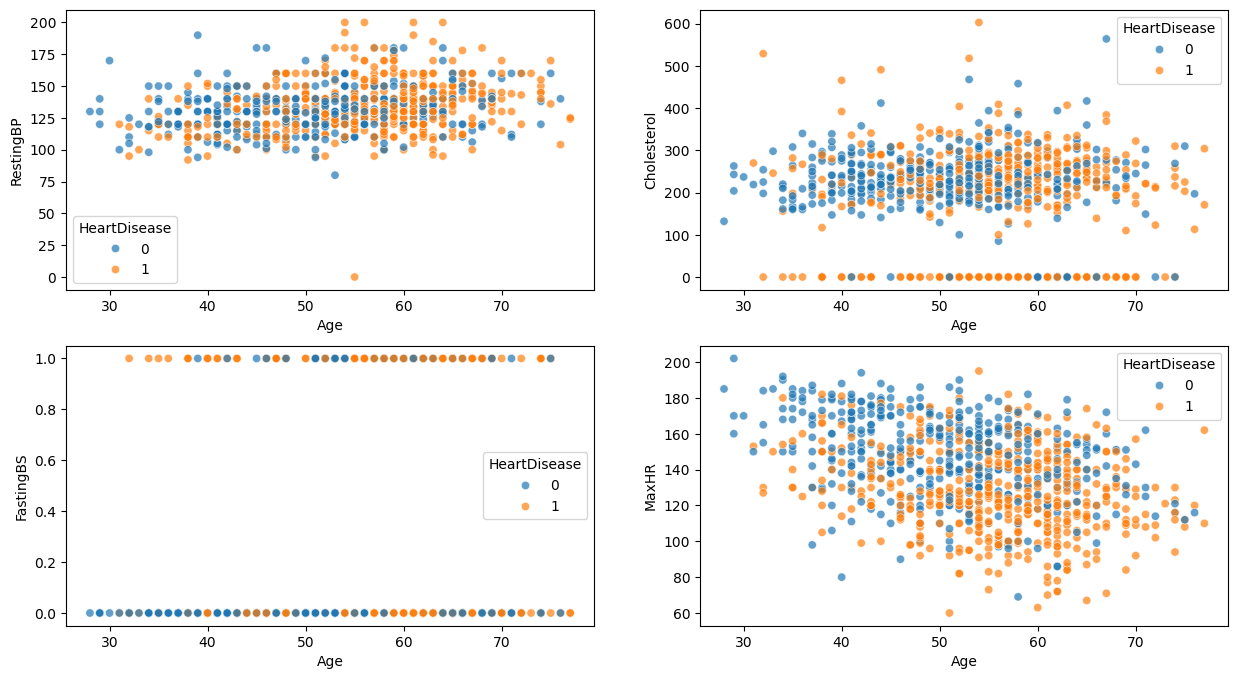

In [70]:
fig,axes=plt.subplots(2,2,figsize=(15,8))
sns.scatterplot(data=data,x='Age',y='RestingBP',ax=axes[0][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='Cholesterol',ax=axes[0][1],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='FastingBS',ax=axes[1][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='MaxHR',ax=axes[1][1],hue='HeartDisease',alpha=0.7)
plt.show()

1.	MaxHR and FastingBS stand out as key indicators for predicting heart disease across all age groups. People diagnosed with heart disease consistently show lower MaxHR values, while elevated fasting blood sugar (FastingBS = 1) is common.
	2.	Cholesterol and RestingBP gain importance in older age groups for identifying heart disease:
	•	Cholesterol: Higher cholesterol is more frequently seen in individuals aged 50 and above with heart disease, but this trend is less evident in younger age groups.
	•	RestingBP: Higher RestingBP values are more prevalent in people with heart disease, especially in those between the ages of 50 and 70, making it a more critical factor as individuals age.
	3.	Fasting Blood Sugar (FastingBS) maintains a strong and consistent association with heart disease across all age ranges, regardless of other variables.
   

### boxplot

<ipython-input-71-33e498f95002>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['HeartDisease'], y=col, data=data, palette="Set2")
<ipython-input-71-33e498f95002>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['HeartDisease'], y=col, data=data, palette="Set2")
<ipython-input-71-33e498f95002>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['HeartDisease'], y=col, data=data, palette="Set2")
<ipython-input-71-33e498f95002>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

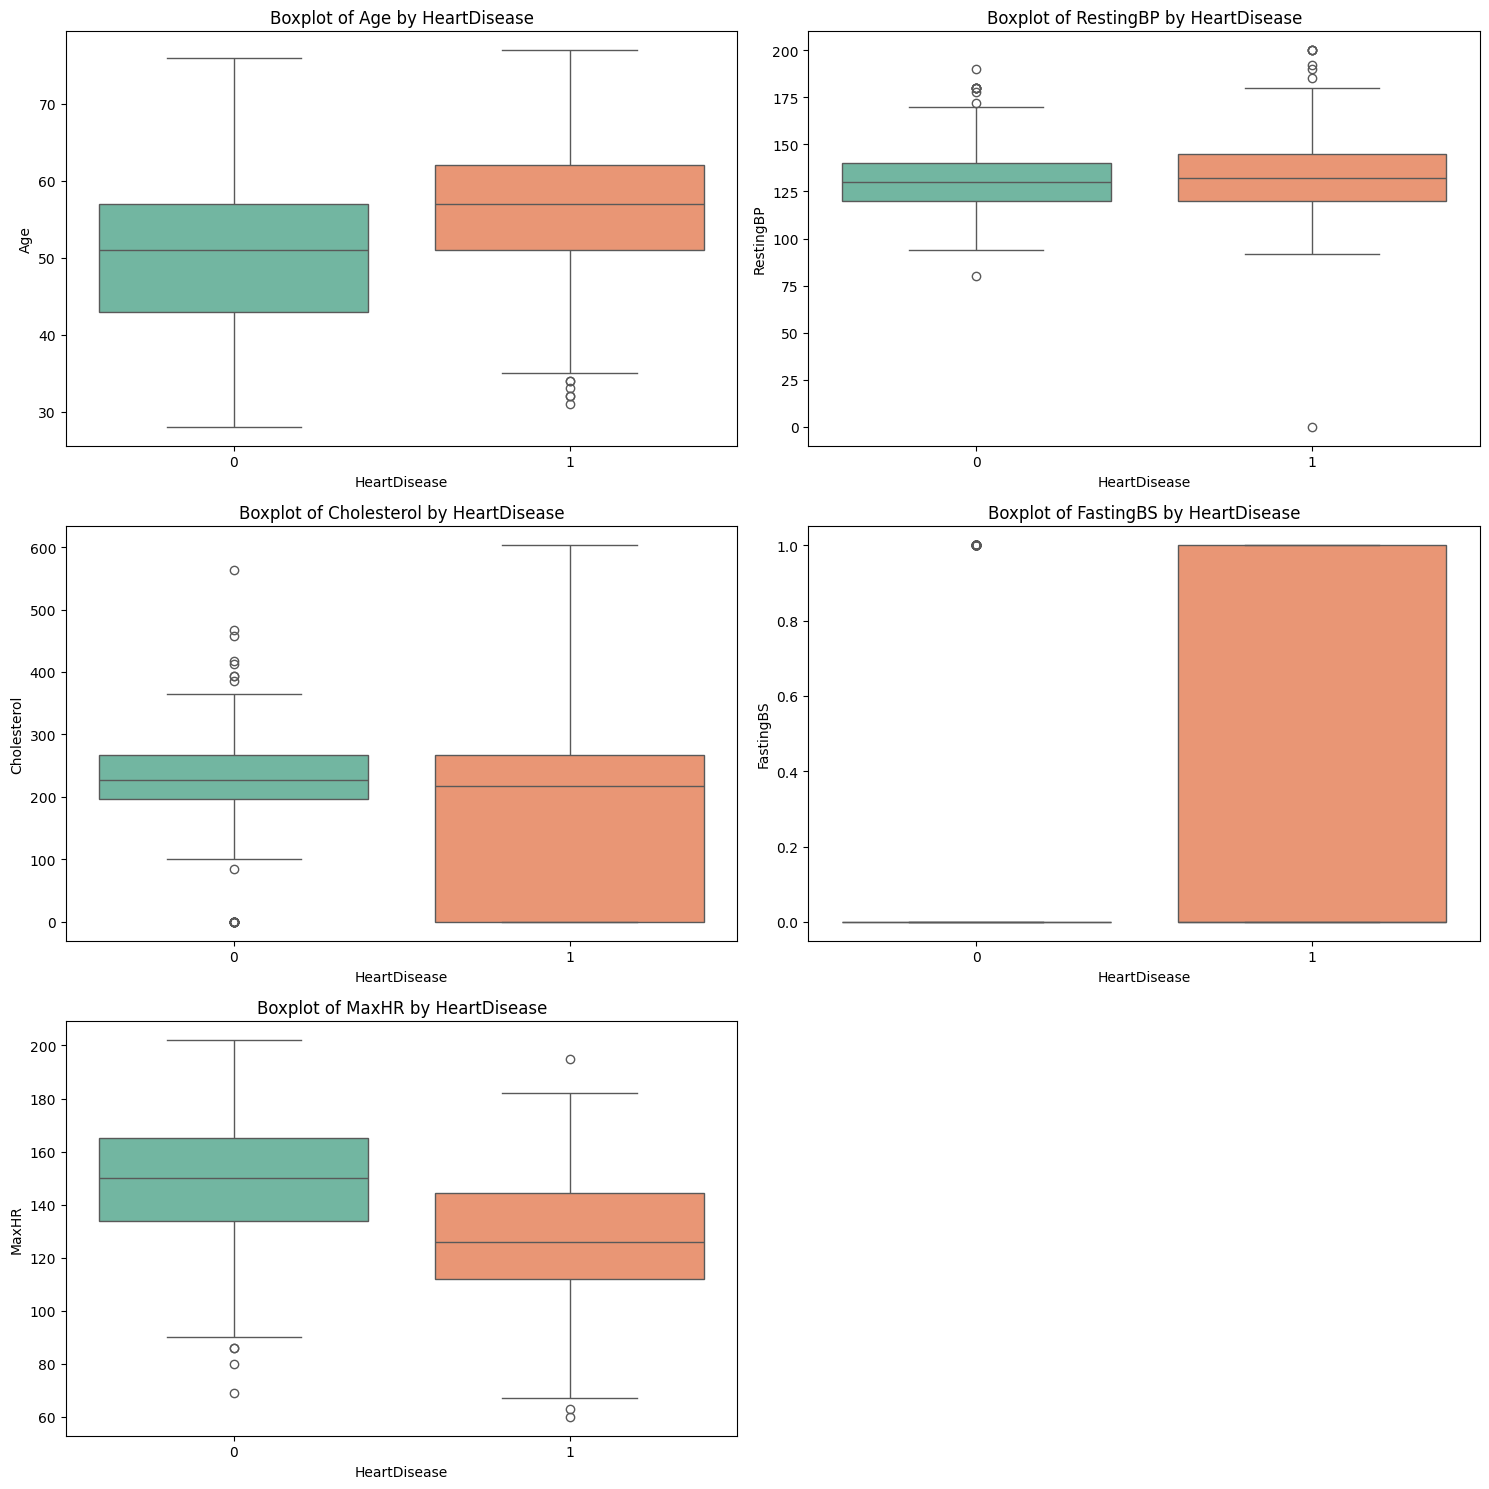

In [71]:
plt.figure(figsize=(15,15))

for i, col in enumerate(data.columns[data.dtypes=='int64'].drop('HeartDisease'), 1):
    plt.subplot(3, 2, i)
    plt.title(f"Boxplot of {col} by HeartDisease")
    sns.boxplot(x=data['HeartDisease'], y=col, data=data, palette="Set2")
    plt.tight_layout()

plt.show()

1.	Individuals with heart disease (orange) tend to be older, with a median age of around 58, while those without heart disease (green) have a lower median age, approximately 52.
	2.	RestingBP shows a wider range and more outliers in individuals with heart disease, suggesting that high blood pressure may play a role in heart disease risk.
	3.	Cholesterol levels are significantly higher in those with heart disease, indicating that high cholesterol is a potential risk factor.
	4.	Fasting Blood Sugar is a strong indicator of heart disease, as nearly all individuals without heart disease have low fasting blood sugar, while those with heart disease typically exhibit higher levels.
	5.	For individuals without heart disease, the median MaxHR is higher, around 155 bpm, with most values concentrated between 130 and 165 bpm. In contrast, individuals with heart disease have a lower median MaxHR, around 140 bpm, with a wider range of values, displaying greater variability and more outliers. This suggests that people with heart disease tend to have lower MaxHR compared to those without heart disease.

### bar charts

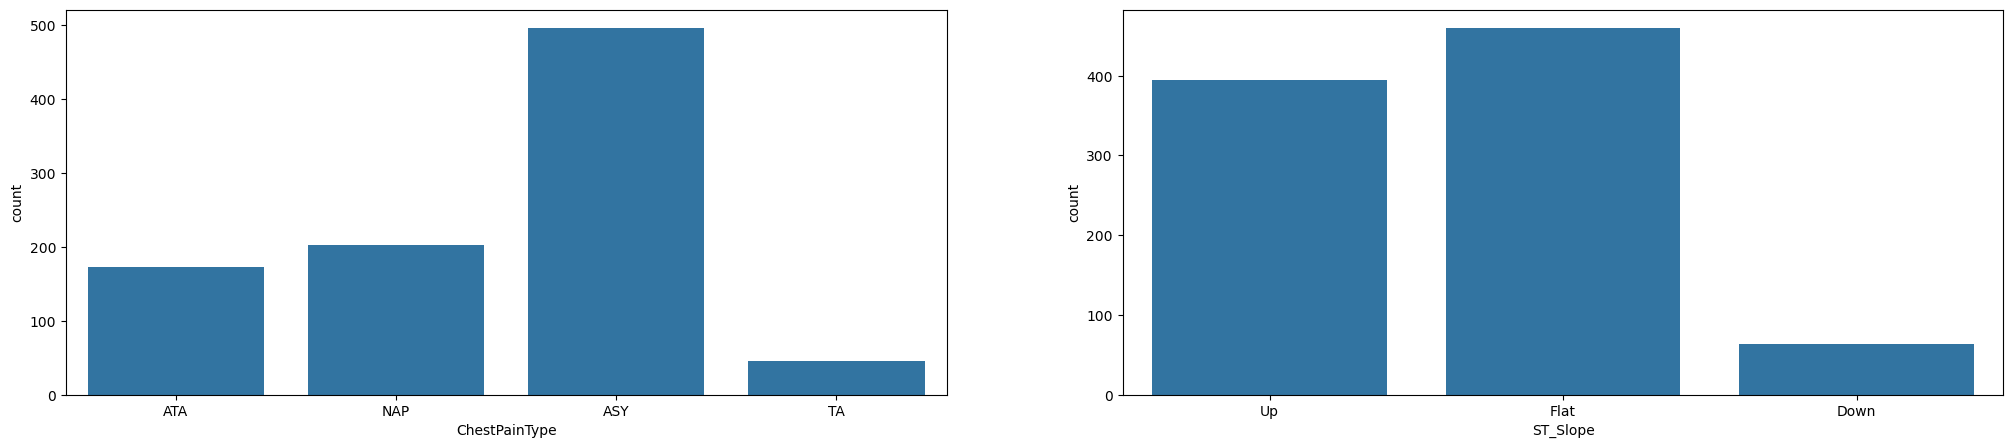

In [79]:
cat = ['ChestPainType',  'ST_Slope']
plt.figure(figsize=(25, 5))
for i in range(len(cat)):  
    plt.subplot(1, 2, i + 1)  
    sns.countplot(x=cat[i], data=data)

In [ ]:
This graph displays two count plots, representing the distribution of ChestPainType and ST_Slope from the heart disease dataset. The ChestPainType plot shows that most people have the ASY (asymptomatic) type, which means they do not experience noticeable symptoms of chest pain. For the ST_Slope plot, the majority of people have a Flat ST segment, which could indicate a risk of heart issues. These findings suggest that asymptomatic chest pain and a flat ST slope are common among the individuals in the dataset, both of which could be associated with heart disease.

## Data Preprocessing 

### Missing Values 
The dataset contains 173 missing value. 

In [35]:
data = pd.read_csv('HeartFailure.csv')

## replace 0 (null value in certain culmns) with None
data['Cholesterol'].replace(0, None, inplace=True)
data['RestingBP'].replace(0, None, inplace=True)
data['MaxHR'].replace(0, None, inplace=True)
data['Age'].replace(0, None, inplace=True)
 
rows_with_missing = data[data.isna().any(axis=1)];

print('Missing: ',data.isna().sum())
print("\nRows with missing values:");
print(rows_with_missing);

<ipython-input-35-58a44433624b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cholesterol'].replace(0, None, inplace=True)
<ipython-input-35-58a44433624b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Missing:  Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

Rows with missing values:
     Age Sex ChestPainType RestingBP Cholesterol  FastingBS RestingECG  MaxHR  \
293   65   M           ASY       115        None          0     Normal     93   
294   32   M            TA        95        None          1     Normal    127   
295   61   M           ASY       105        None          1     Normal    110   
296   50   M           ASY       145        None          1     Normal    139   
297   57   M           ASY       110        None          1         ST    131   
..   ...  ..           ...       ...         ...        ...        ...    ...   
514   43   M           ASY       122        None          0     Normal    120   
515   63   M           NAP       130  

### Replace missing data with the average

In [36]:
data = pd.read_csv('HeartFailure.csv')

Cholesterol_mean = data['Cholesterol'].mean()
RestingBP_mean = data['RestingBP'].mean()

data['Cholesterol'].fillna(Cholesterol_mean , inplace=True)
data['RestingBP'].fillna(RestingBP_mean , inplace=True)

print('Missing: ', data.isna().sum())


<ipython-input-36-09478dbd5e8b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cholesterol'].fillna(Cholesterol_mean , inplace=True)
<ipython-input-36-09478dbd5e8b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Missing:  Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### Duplicate Values

The dataset doesn't contain any duplicate rows.

In [37]:
data = pd.read_csv('HeartFailure.csv')

num_duplicates = data.duplicated().sum()
data_cleaned = data.drop_duplicates()
print("Number of duplicate rows:", num_duplicates)
data_cleaned.to_csv('Cleaned_dataset.csv', index=False)

Number of duplicate rows: 0


### Handling outliers
Prior to handling the outliers, we selected the IQR method to identify the number of outliers within our dataset


In [38]:
data = pd.read_csv('HeartFailure.csv')

##Identifying the outliers
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns 
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
RestingBP: 28 rows with outliers
Cholesterol: 183 rows with outliers
MaxHR: 2 rows with outliers
Oldpeak: 16 rows with outliers
Total Rows with Outliers: 229


### Removing the Outliers
As shown by the previous code, the total number of outliers is 229, indicating a significant presence of extreme values.
To handle this, we chose to **cap** the outliers instead of removing them, **replacing them with the nearest non-outlier values**. This approach retains the full dataset while reducing the impact of extreme values, preserving valuable information for our analysis, The large number of outliers in the dataset suggests the existence of extreme values that differ considerably from the main cluster of data points. These outliers represent data points that fall far outside the expected range of values, indicating substantial deviations from the typical patterns observed. Their presence may be due to various factors, such as rare occurrences, data entry errors, or inherent variability in the population being studied.

In [39]:
data = pd.read_csv('HeartFailure.csv')

outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns 
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows = len(data)

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers

    # Cap outliers by setting them to the nearest non-outlier value
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    data[column] = np.clip(data[column], lower_bound, upper_bound)
data.to_csv('Cleaned_dataset.csv', index=False)

In [ ]:
### Checking outliers Removal

In [40]:
data1 = pd.read_csv('Cleaned_dataset.csv')
outlier_threshold = 1.5

def count_outliers(column_data1):
    q1 = np.percentile(column_data1, 25)
    q3 = np.percentile(column_data1, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data1 > upper_bound) | (column_data1 < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns 
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data1[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data1)
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
RestingBP: 0 rows with outliers
Cholesterol: 0 rows with outliers
MaxHR: 0 rows with outliers
Oldpeak: 0 rows with outliers
Total Rows with Outliers: 0


### Encoding
we encode the columns as following for better handling:

1. **Sex** (Gender of the patient):
   - Before encoding: Categories like "Male", "Female".
   - After encoding: 
     - 0 = Female
     - 1 = Male

2. **ChestPainType** (Type of chest pain the patient experiences):
   - Before encoding: Categories like "TA" (Typical Angina), "ATA" (Atypical Angina), "NAP" (Non-Anginal Pain), "ASY" (Asymptomatic).
   - After encoding: 
     - 0 = ASY
     - 1 = ATA
     - 2 = NAP
     - 3 = TA

3. **RestingECG** (Resting electrocardiogram results):
   - Before encoding: Categories like "Normal", "ST" (ST-T wave abnormality), "LVH" (Left Ventricular Hypertrophy).
   - After encoding: 
     - 0 = LVH
     - 1 = Normal
     - 2 = ST

4. **ST_Slope** (Slope of the peak exercise ST segment):
   - Before encoding: Categories like "Up", "Flat", "Down".
   - After encoding: 
     - 0 = Down
     - 1 = Flat
     - 2 = Up

5. **ExerciseAngina** (Angina during exercise):
   - Before encoding: Categories like "Yes", "No".
   - After encoding: 
     - 0 = No
     - 1 = Yes



In [41]:
data = pd.read_csv('Cleaned_dataset.csv')

# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical columns you want to encode (adjust this based on your dataset)
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina']  # Update based on your dataset's column names

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])
    else:
        print(f"Column '{col}' not found in the dataset!")

# Save the encoded dataset to a CSV file
data.to_csv('Encoded_data.csv', index=False)
# Display the first few rows of the encoded dataset
print("Data after Label Encoding:")
print(data.head())

Data after Label Encoding:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140        289.0          0           1   
1   49    0              2        160        180.0          0           1   
2   37    1              1        130        283.0          0           2   
3   48    0              0        138        214.0          0           1   
4   54    1              2        150        195.0          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


### Normalization
Here in the Normalization process we chose Decimal scaling, we normalize the attributes and unify their scale since the range for each attribute is quite different. This ensures that all the features have comparable ranges, preventing attributes with larger values from dominating others. This method helps us to format all the values in the dataset, making them more consistent and easier for identify and assess heart disease risk factors effectively.

In [42]:
data = pd.read_csv('Encoded_data.csv')
# Columns to normalize
columns_to_normalize = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = data[column].abs().max()
    data[column] = data[column] / (10 ** len(str(int(max_abs_value))))

print("DataFrame after Decimal Scaling Normalization:")
print(data)
data.to_csv('encoding_normalization.csv', index=False)

DataFrame after Decimal Scaling Normalization:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.40    1              1      0.140        0.289          0           1   
1    0.49    0              2      0.160        0.180          0           1   
2    0.37    1              1      0.130        0.283          0           2   
3    0.48    0              0      0.138        0.214          0           1   
4    0.54    1              2      0.150        0.195          0           1   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.45    1              3      0.110        0.264          0           1   
914  0.68    1              0      0.144        0.193          1           1   
915  0.57    1              0      0.130        0.131          0           1   
916  0.57    0              1      0.130        0.236          0           0   
917  0.38    1              2      0.138        0.175          0         

### Aggregation 

In [43]:
data = pd.read_csv('encoding_normalization.csv')
data.groupby('Sex').agg('max')
data.groupby(['Sex', 'HeartDisease']).agg('mean')

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  \
Sex HeartDisease                                                               
0   0             0.512028       1.237762   0.128580     0.246087   0.069930   
    1             0.561800       0.380000   0.140160     0.229838   0.320000   
1   0             0.502022       1.168539   0.130738     0.218356   0.127341   
    1             0.558690       0.456332   0.133164     0.179639   0.336245   

                  RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
Sex HeartDisease                                                            
0   0               0.916084  0.149049        0.111888  0.043566  1.720280  
    1               0.860000  0.137820        0.540000  0.127700  1.020000  
1   0               0.966292  0.147670        0.146067  0.039157  1.749064  
    1               1.039301  0.126566        0.631004  0.125568  1.061135

### Discretization 
In this discretization process, we categorized the attributes as follows:


1. Age:
   - Categories:
     - 28-50 years: Young
     - 50-58 years: Middle-Aged
 58+years: Old
   - Reason for Discretization:  
     To simplify the analysis of age's impact on heart disease risk.

2. Resting Blood Pressure:
   - Categories:
     - Very Low: 0-120 mmHg
     - Low: 120-130 mmHg
     - Normal: 130-140 mmHg
     - High: 140-200 mmHg
   - Reason for Discretization:  
     To differentiate between blood pressure levels and their effects on heart health.

3. Cholesterol Levels:
   - Categories:
     - Low: 0-197 mg/dL
     - Moderate: 197-250 mg/dL
     - High: 250-603 mg/dL
   - Reason for Discretization:  
     To facilitate comparisons of cholesterol levels and their relation to heart disease risk.

4. Maximum Heart Rate:
   - Categories:
     - Low: 60-125 bpm
     - Moderate: 125-150 bpm
     - High: 150-202 bpm
   - Reason for Discretization:  
     To identify the impact of fitness levels on heart health.

5. Oldpeak (Depression Level):
   - Categories:
     - No Depression: -2.6 to 0
     - Mild Depression: 0 to 1.2
     - Severe Depression: 1.2 to 6.2
   - Reason for Discretization:  
     To distinguish between cardiac depression levels based on exercise performance

We utilized these simplifications to enhance the interpretability and analysis of the data, making it easier to identify and assess heart disease risk factors effectively.

In [44]:
data = pd.read_csv('encoding_normalization.csv')

age_labels = ["Young", "Middle-Aged", "Old"]
data["Age"] = pd.qcut(data["Age"], q=3, labels=age_labels)

bp_labels = ["Very Low", "Low", "Normal", "High"]
data["RestingBP"] = pd.qcut(data["RestingBP"], q=4, labels=bp_labels)


cholesterol_labels = ["Low", "Moderate", "High"]
data["Cholesterol"] = pd.qcut(data["Cholesterol"], q=3, labels=cholesterol_labels)


maxhr_labels = ["Low", "Moderate", "High"]
data["MaxHR"] = pd.qcut(data["MaxHR"], q=3, labels=maxhr_labels)


oldpeak_labels = ["No Depression", "Mild Depression", "Severe Depression"]
data["Oldpeak"] = pd.qcut(data["Oldpeak"], q=3, labels=oldpeak_labels)


print(data) 
data.to_csv('after_discretization.csv', index=False)

             Age  Sex  ChestPainType RestingBP Cholesterol  FastingBS  \
0          Young    1              1    Normal        High          0   
1          Young    0              2      High         Low          0   
2          Young    1              1       Low        High          0   
3          Young    0              0    Normal    Moderate          0   
4    Middle-Aged    1              2      High         Low          0   
..           ...  ...            ...       ...         ...        ...   
913        Young    1              3  Very Low        High          0   
914          Old    1              0      High         Low          1   
915  Middle-Aged    1              0       Low         Low          0   
916  Middle-Aged    0              1       Low    Moderate          0   
917        Young    1              2    Normal         Low          0   

     RestingECG     MaxHR  ExerciseAngina            Oldpeak  ST_Slope  \
0             1      High               0      No

### Feature Selection 
* #### Chi-Square:
We need to focus on categorical attributes to apply the Chi-square test and determine uncorrelated attributes with respect to the class label "HeartDisease". The categorical attribute in our dataset after applying all data transformation methods is "Age".

In [45]:
data = pd.read_csv('after_discretization.csv')

# List of categorical columns to test
categorical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Function to perform Chi-square test for each categorical column
def chi_square_test(data, target_col, cat_cols):
    results = {}
    for col in cat_cols:
        # Create a contingency table
        contingency_table = pd.crosstab(data[col], data[target_col])
        
        # Perform the Chi-square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table) 
        
        # Store the result
        results[col] = {
            'Chi-square Statistic': chi2_stat,
            'Degrees of Freedom': dof,
            'expected':expected
        }
    return results

# Apply the Chi-square test
chi_square_results = chi_square_test(data, 'HeartDisease', categorical_columns)

# Display the results
for column, result in chi_square_results.items():
    print(f"Column: {column}")
    print(f"Chi-square Statistic: {result['Chi-square Statistic']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print(f"Expected:") 
    print(f"{result['expected']}\n") 

Column: Age
Chi-square Statistic: 65.08090035638334
Degrees of Freedom: 2
Expected:
[[140.23965142 173.76034858]
 [128.62745098 159.37254902]
 [141.1328976  174.8671024 ]]

Column: RestingBP
Chi-square Statistic: 20.97630037410108
Degrees of Freedom: 3
Expected:
[[ 98.25708061 121.74291939]
 [ 89.32461874 110.67538126]
 [ 91.5577342  113.4422658 ]
 [130.86056645 162.13943355]]

Column: Cholesterol
Chi-square Statistic: 30.782274715683553
Degrees of Freedom: 2
Expected:
[[136.22004357 168.77995643]
 [138.00653595 170.99346405]
 [135.77342048 168.22657952]]

Column: MaxHR
Chi-square Statistic: 146.58661140651304
Degrees of Freedom: 2
Expected:
[[124.16122004 153.83877996]
 [144.25925926 178.74074074]
 [141.5795207  175.4204793 ]]

Column: Oldpeak
Chi-square Statistic: 148.50725792086038
Degrees of Freedom: 2
Expected:
[[105.8496732  131.1503268 ]
 [170.16339869 210.83660131]
 [133.9869281  166.0130719 ]]



* #### Correlation Coefficient:

In [46]:
data = pd.read_csv('after_discretization.csv')

cor_Sex = data['Sex'].corr(data['HeartDisease'])
cor_ChestPainType = data['ChestPainType'].corr(data['HeartDisease'])
cor_FastingBS = data['FastingBS'].corr(data['HeartDisease'])
cor_ExerciseAngina = data['ExerciseAngina'].corr(data['HeartDisease'])
cor_ST_Slope = data['ST_Slope'].corr(data['HeartDisease'])
cor_RestingECG = data['RestingECG'].corr(data['HeartDisease'])

print(f'Correlation Coefficient: ')
print("Sex:", cor_Sex) 
print("ChestPainType:", cor_ChestPainType)
print("FastingBS:", cor_FastingBS)
print("ExerciseAngina:", cor_ExerciseAngina)
print("ST_Slope :", cor_ST_Slope )
print("RestingECG  :", cor_RestingECG)



Correlation Coefficient: 
Sex: 0.30544491596313866
ChestPainType: -0.38682769426256153
FastingBS: 0.2672911861103007
ExerciseAngina: 0.4942819918242627
ST_Slope : -0.5587707148497031
RestingECG  : 0.057384357013450675


### Feature Selection Analysis: 

#### **Correlation Coefficient**: 
*  ST_Slope (-0.56): The strongest negative correlation with heart disease, suggests that a steeper decline in the ST segment, is linked to a higher likelihood of heart disease.

* ExerciseAngina (0.49): The strongest positive correlation, suggesting that patients who experience angina during exercise are associated with the likelihood of heart disease.

* ChestPainType (-0.39): Moderate negative correlation, meaning a certain types of chest pain are inversely associated with the likelihood of heart disease.


* Sex (0.31): Moderate positive correlation, suggesting that one of the sexes is more likely to have heart disease compared to the other.

* FastingBS (0.27): Weak positive correlation, indicating that patients with elevated fasting blood sugar are slightly more likely to have heart disease.  

* RestingECG  (0.06): Very weak correlation, meaning that the resting electrocardiogram results have almost no linear relationship with the presence of heart disease.

In conclusion, and based on the results, we decided to **delete the RestingECG** column due to its weak correlation (0.06) with heart disease.


#### **Chi-square**: 
After reviewing the probability (alpha) table, we chose the significance level of 0.05; therefore, the critical value is 5.991.
When comparing the Chi-square statistics to the critical value, we see that the Chi-square statistics for every attribute in the test is greater than the critical value ( 65 > 5.9917), ( 21 > 5.9917), ( 31 > 5.9917), ( 147 > 5.9917), ( 149 > 5.9917). 

This means that all the categorical attributes provide valuable information for predicting whether or not a patient has heart disease.
Therefore, the correlation is stronger in this case, leading us to **keep all of the categorical attributes**. 

### Drop uncorrelated columns

In [47]:
data= pd.read_csv('after_discretization.csv')
data= data.drop(['RestingECG'], axis=1)

data.to_csv('Preprocessed_dataset.csv', index=False)
print(data)

             Age  Sex  ChestPainType RestingBP Cholesterol  FastingBS  \
0          Young    1              1    Normal        High          0   
1          Young    0              2      High         Low          0   
2          Young    1              1       Low        High          0   
3          Young    0              0    Normal    Moderate          0   
4    Middle-Aged    1              2      High         Low          0   
..           ...  ...            ...       ...         ...        ...   
913        Young    1              3  Very Low        High          0   
914          Old    1              0      High         Low          1   
915  Middle-Aged    1              0       Low         Low          0   
916  Middle-Aged    0              1       Low    Moderate          0   
917        Young    1              2    Normal         Low          0   

        MaxHR  ExerciseAngina            Oldpeak  ST_Slope  HeartDisease  
0        High               0      No Depression